In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from constants import LOCATION_CHOOSEN, INPUT_DIR, OUTPUT_DIR, DATA_CACHE_DIR, STRINGENCY_BASED_GDP

data_path = os.path.join(DATA_CACHE_DIR, LOCATION_CHOOSEN + ".csv")
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
else:
    df = pd.read_excel(os.path.join(INPUT_DIR, "owid-covid-data.xlsx"))
    df = df.loc[df['iso_code'] == LOCATION_CHOOSEN]
    df.to_csv(data_path, index=False)

print(f'All columns in dataset: {df.columns}')

All columns in dataset: Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinati

In [2]:
df = df[["date", "stringency_index", "total_cases", "total_deaths", "total_vaccinations", "population", "people_fully_vaccinated"]]

def print_missing_stats(df, title):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    print(f'{title}: \n{missing_value_df}')


print_missing_stats(df, "Before preprocessing")

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.interpolate(method='time', inplace=True)

print_missing_stats(df, "After interpolation")

df.ffill(inplace=True)
df.bfill(inplace=True)

print_missing_stats(df, "After complete preprocessing")

Before preprocessing: 
                                     column_name  percent_missing
date                                        date         0.000000
population                            population         0.000000
total_cases                          total_cases         2.255109
total_deaths                        total_deaths         5.285412
stringency_index                stringency_index        22.903453
total_vaccinations            total_vaccinations        28.541226
people_fully_vaccinated  people_fully_vaccinated        30.655391
After interpolation: 
                                     column_name  percent_missing
stringency_index                stringency_index         0.000000
population                            population         0.000000
total_cases                          total_cases         1.902748
total_deaths                        total_deaths         4.933051
total_vaccinations            total_vaccinations        26.638478
people_fully_vaccinated  people

In [3]:
mei_data = pd.read_csv(os.path.join(INPUT_DIR, "MEI_24112023074356372.csv"))
print(f'MEI data columns: {mei_data.columns}')
print(f'MEI data subjects: {mei_data["Subject"].unique()}')
print(f'MEI data locations: {mei_data["LOCATION"].unique()}')

MEI data columns: Index(['LOCATION', 'Country', 'SUBJECT', 'Subject', 'MEASURE', 'Measure',
       'FREQUENCY', 'Frequency', 'TIME', 'Time', 'Unit Code', 'Unit',
       'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')
MEI data subjects: ['Leading Indicators OECD > Component series > Bank activity > Normalised'
 'Leading Indicators OECD > Component series > Bank activity > Original series'
 'Leading Indicators OECD > Component series > BTS - Sales expectations > Normalised'
 'Leading Indicators OECD > Component series > BTS - Sales expectations > Original series'
 'Leading Indicators OECD > Component series > BTS - Demand or orders inflow > Normalised'
 'Leading Indicators OECD > Component series > BTS - Demand or orders inflow > Original series'
 'Leading Indicators OECD > Component series > BTS - Employment > Normalised'
 'Leading Indicators OECD > Component series > BTS - Employment > Original se

/tmp/ipykernel_19181/2505627277.py:1: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  mei_data = pd.read_csv(os.path.join(INPUT_DIR, "MEI_24112023074356372.csv"))


In [4]:
df

,stringency_index,total_cases,total_deaths,total_vaccinations,population,people_fully_vaccinated
date,,,,,,
2020-01-03,0.0,1.0,1.0,0.000000e+00,1417173120,7668.0
2020-01-04,0.0,1.0,1.0,0.000000e+00,1417173120,7668.0
2020-01-05,0.0,1.0,1.0,0.000000e+00,1417173120,7668.0
2020-01-06,0.0,1.0,1.0,0.000000e+00,1417173120,7668.0
2020-01-07,0.0,1.0,1.0,0.000000e+00,1417173120,7668.0
...,...,...,...,...,...,...
2023-11-17,28.7,45001456.0,533295.0,2.206749e+09,1417173120,951986588.0
2023-11-18,28.7,45001456.0,533295.0,2.206749e+09,1417173120,951986616.0
2023-11-19,28.7,45001456.0,533295.0,2.206749e+09,1417173120,951986658.0


In [5]:
print(mei_data.loc[(mei_data['LOCATION'] == LOCATION_CHOOSEN) & (mei_data["Frequency"] == "Monthly") & (mei_data["Subject"] == "Leading Indicators OECD > Reference series > Gross Domestic Product (GDP) > Normalised")].columns)

Index(['LOCATION', 'Country', 'SUBJECT', 'Subject', 'MEASURE', 'Measure',
       'FREQUENCY', 'Frequency', 'TIME', 'Time', 'Unit Code', 'Unit',
       'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')


In [6]:
print(mei_data.loc[(mei_data['LOCATION'] == LOCATION_CHOOSEN) & (mei_data["Frequency"] == "Monthly") & (mei_data["Subject"] == "Leading Indicators OECD > Reference series > Gross Domestic Product (GDP) > Normalised")][["TIME", "Value", "SUBJECT"]])

          TIME       Value   SUBJECT
23811  2016-01  100.242998  LORSGPNO
23812  2016-02  100.350121  LORSGPNO
23813  2016-03  100.449281  LORSGPNO
23814  2016-04  100.537791  LORSGPNO
23815  2016-05  100.613771  LORSGPNO
...        ...         ...       ...
23895  2023-01  100.504360  LORSGPNO
23896  2023-02  100.683176  LORSGPNO
23897  2023-03  100.867029  LORSGPNO
23898  2023-04  101.054082  LORSGPNO
23899  2023-05  101.242887  LORSGPNO

[89 rows x 3 columns]


In [7]:
print(mei_data.loc[(mei_data['LOCATION'] == LOCATION_CHOOSEN) & (mei_data["Frequency"] == "Monthly") & (mei_data["Subject"] == "Leading Indicators OECD > Reference series > Gross Domestic Product (GDP) > Normalised")]["SUBJECT"].unique())

['LORSGPNO']


In [8]:
def merge_data(df, mei_data, subject_selected):
    df_gdp = mei_data.loc[(mei_data['LOCATION'] == LOCATION_CHOOSEN) & (mei_data["Frequency"] == "Monthly") & (mei_data["Subject"] == subject_selected) & (mei_data["SUBJECT"] == "LORSGPNO")]
    print(subject_selected, df_gdp.shape[0])
    """
    if subject_based_data.shape[0] > 0:
        subject_based_data.loc[:, 'TIME'] = pd.to_datetime(subject_based_data['TIME'])
        print(subject_based_data['TIME'].unique())
        merged_df = pd.merge(df, subject_based_data[['TIME', 'Value']], left_on='date', right_on='TIME', how='inner')
        merged_df.drop(columns=['TIME'], inplace=True)
        merged_df.rename(columns={'Value': "".join(subject_selected.split(">")[2:])}, inplace=True)
        df = merged_df
        return df
    """
    if df_gdp.shape[0] > 0:
        df_gdp.rename(columns={'TIME': 'date'}, inplace=True)
        df_gdp['date'] = pd.to_datetime(df_gdp['date'])
        df_gdp = df_gdp[['date', 'Value']]
        df_gdp.rename(columns={'Value': "".join(subject_selected.split(">")[2:]).strip()}, inplace=True)
        print_missing_stats(df_gdp, "Before preprocessing")
        
        df_gdp.set_index('date', inplace=True)

        # Merge the two DataFrames
        df_merged = pd.concat([df, df_gdp], axis=1)
        
        # df_merged.interpolate(method='time', inplace=True)
        
        print("Min-max date before: ", df_merged.index.min(), df_merged.index.max())
        min_date = df.index.min()
        max_date = df.index.max()
        df_merged = df_merged[(df_merged.index >= min_date) & (df_merged.index <= max_date)]
        print("Min-max date before: ", df_merged.index.min(), df_merged.index.max())
        return df_merged

In [9]:
df_merged = merge_data(df, mei_data, "Leading Indicators OECD > Reference series > Gross Domestic Product (GDP) > Normalised")
df_merged

/tmp/ipykernel_19181/384070853.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp.rename(columns={'TIME': 'date'}, inplace=True)
/tmp/ipykernel_19181/384070853.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp['date'] = pd.to_datetime(df_gdp['date'])


Leading Indicators OECD > Reference series > Gross Domestic Product (GDP) > Normalised 89
Before preprocessing: 
                                                                       column_name  \
date                                                                          date   
Gross Domestic Product (GDP)  Normalised  Gross Domestic Product (GDP)  Normalised   

                                          percent_missing  
date                                                  0.0  
Gross Domestic Product (GDP)  Normalised              0.0  
Min-max date before:  2016-01-01 00:00:00 2023-11-21 00:00:00
Min-max date before:  2020-01-03 00:00:00 2023-11-21 00:00:00


,stringency_index,total_cases,total_deaths,total_vaccinations,population,people_fully_vaccinated,Gross Domestic Product (GDP) Normalised
date,,,,,,,
2020-01-03,0.0,1.0,1.0,0.000000e+00,1.417173e+09,7668.0,NaN
2020-01-04,0.0,1.0,1.0,0.000000e+00,1.417173e+09,7668.0,NaN
2020-01-05,0.0,1.0,1.0,0.000000e+00,1.417173e+09,7668.0,NaN
2020-01-06,0.0,1.0,1.0,0.000000e+00,1.417173e+09,7668.0,NaN
2020-01-07,0.0,1.0,1.0,0.000000e+00,1.417173e+09,7668.0,NaN
...,...,...,...,...,...,...,...
2023-11-17,28.7,45001456.0,533295.0,2.206749e+09,1.417173e+09,951986588.0,NaN
2023-11-18,28.7,45001456.0,533295.0,2.206749e+09,1.417173e+09,951986616.0,NaN
2023-11-19,28.7,45001456.0,533295.0,2.206749e+09,1.417173e+09,951986658.0,NaN


In [10]:
df = df_merged
print(df.columns)

Index(['stringency_index', 'total_cases', 'total_deaths', 'total_vaccinations',
       'population', 'people_fully_vaccinated',
       'Gross Domestic Product (GDP)  Normalised'],
      dtype='object')


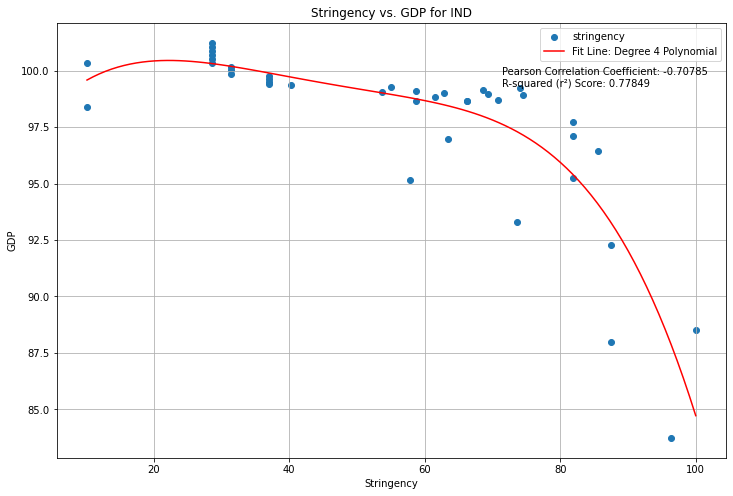

In [11]:
# df = df[(df['date'].dt.year == 2021) & (df['date'].dt.month >= 5) | (df['date'].dt.year == 2022)]
selected_dates = df[df['Gross Domestic Product (GDP)  Normalised'].notnull()].index
stringency = df.loc[selected_dates, 'stringency_index']
gdp = df.loc[selected_dates, 'Gross Domestic Product (GDP)  Normalised']

correlation_coefficient, _ = pearsonr(stringency, gdp)

fit_coefficients = np.polyfit(stringency, gdp, 4)
fit_line = np.poly1d(fit_coefficients)

np.save('stringency_based_gdp.npy', fit_line)

r2 = r2_score(gdp, fit_line(stringency))

plt.figure(figsize=(12, 8))
plt.scatter(stringency, gdp, label="stringency")

stringency_range = np.linspace(min(stringency), max(stringency), 100)  # Generating a range for the fitted line
plt.plot(stringency_range, fit_line(stringency_range), color='red', label=f'Fit Line: Degree 4 Polynomial')
plt.figtext(0.64, 0.77, f'\nPearson Correlation Coefficient: {correlation_coefficient:.5f}\nR-squared (r²) Score: {r2:.5f}')

plt.title('Stringency vs. GDP for ' + LOCATION_CHOOSEN)
plt.xlabel('Stringency')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "stringency_vs_gdp_" + LOCATION_CHOOSEN + ".png"))
plt.show()

In [12]:
df.to_csv(os.path.join(DATA_CACHE_DIR, LOCATION_CHOOSEN + "_with_GDP.csv"), index=False)

85.19148201143582 100.45563350466735


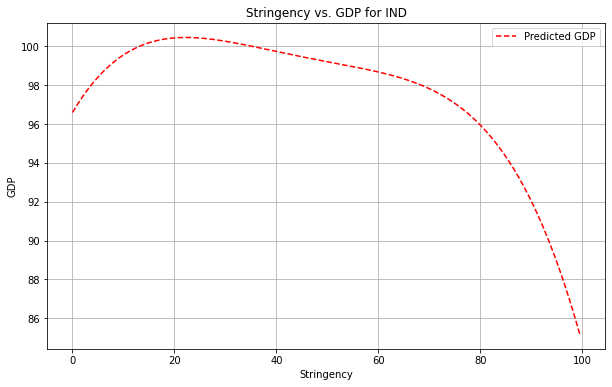

In [13]:
stringency_data_points = np.arange(0, 100, 0.5)
predicted_gdp = fit_line(stringency_data_points)

MIN_GDP = min(predicted_gdp)
MAX_GDP = max(predicted_gdp)
print(MIN_GDP, MAX_GDP)

plt.figure(figsize=(10, 6))
plt.plot(stringency_data_points, predicted_gdp, label="Predicted GDP", color='red', linestyle='--')
plt.title('Stringency vs. GDP for ' + LOCATION_CHOOSEN)
plt.xlabel('Stringency')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "stringency_vs_gdp_extended_" + LOCATION_CHOOSEN + ".png"))
plt.show()

In [14]:
# check save and load
fit_line_loaded = np.poly1d(np.load(STRINGENCY_BASED_GDP))
print(fit_line_loaded(100.0))

84.71974778175547


In [15]:
df['Gross Domestic Product (GDP)  Normalised']

date
2020-01-03   NaN
2020-01-04   NaN
2020-01-05   NaN
2020-01-06   NaN
2020-01-07   NaN
              ..
2023-11-17   NaN
2023-11-18   NaN
2023-11-19   NaN
2023-11-20   NaN
2023-11-21   NaN
Name: Gross Domestic Product (GDP)  Normalised, Length: 1419, dtype: float64

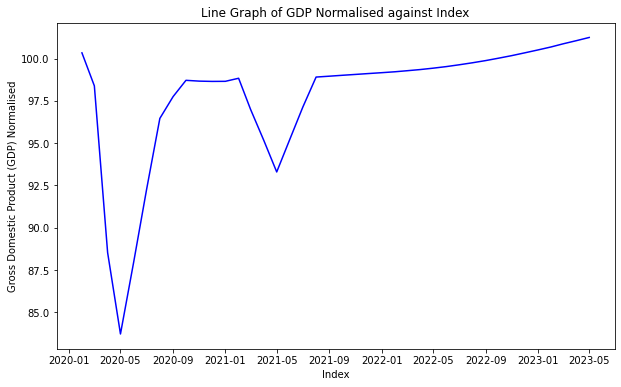

In [16]:
df_selected_dates = df.loc[selected_dates, :]
plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(df_selected_dates['Gross Domestic Product (GDP)  Normalised'], color='b')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Gross Domestic Product (GDP) Normalised')
plt.title('Line Graph of GDP Normalised against Index')

# Display the plot
plt.show()

In [17]:
print(min(selected_dates), max(selected_dates))

2020-02-01 00:00:00 2023-05-01 00:00:00
